In [1]:
%pip install mediapipe opencv-python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        



In [2]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Read Training Data

In [3]:

path = r'C:\Users\henri\Documents\FingerCounterData\DatasetForFingerCounter'
training_path = path + r'\training_landmarks.csv'
training_path
# Write the DataFrame to a CSV file
df = pd.read_csv(training_path)



In [4]:
X_train = df[['x0','y0','z0','x1','y1','z1','x2','y2','z2','x3','y3','z3','x4','y4','z4','x5','y5','z5','x6','y6','z6','x7','y7','z7','x8','y8','z8','x9','y9','z9','x10','y10','z10','x11','y11','z11','x12','y12','z12','x13','y13','z13','x14','y14','z14','x15','y15','z15','x16','y16','z16','x17','y17','z17','x18','y18','z18','x19','y19','z19','x20','y20','z20']]
y_train = df['image']
y_train = y_train.map(lambda image: image.split('_')[2])
X_train.head()

,x0,y0,z0,x1,y1,z1,x2,y2,z2,x3,...,z17,x18,y18,z18,x19,y19,z19,x20,y20,z20
0,0.475704,0.618786,9.811158e-07,0.479171,0.676307,-0.068816,0.486418,0.723549,-0.113471,0.484434,...,-0.050218,0.619755,0.521506,-0.067545,0.647437,0.503105,-0.080805,0.673448,0.490987,-0.091382
1,0.537752,0.787452,6.181712e-07,0.541429,0.714240,0.010108,0.535743,0.657173,0.008893,0.528629,...,-0.029821,0.351435,0.829174,-0.049971,0.317871,0.852092,-0.063870,0.287592,0.865897,-0.070944
2,0.527185,0.675401,1.024003e-06,0.517319,0.735375,-0.056100,0.509863,0.785461,-0.097479,0.496492,...,-0.054030,0.674093,0.644091,-0.072480,0.703382,0.638901,-0.083417,0.731246,0.638665,-0.090553
3,0.625336,0.812698,7.058849e-08,0.617927,0.857443,-0.041134,0.601091,0.881232,-0.075295,0.584662,...,-0.086680,0.606654,0.724276,-0.102114,0.606821,0.733835,-0.096820,0.601851,0.743466,-0.094812
4,0.525047,0.652205,-1.952882e-07,0.481515,0.658926,-0.023100,0.441024,0.685282,-0.037133,0.406550,...,-0.057715,0.607231,0.711297,-0.074118,0.630953,0.735883,-0.076884,0.650610,0.762349,-0.081026


# Build and Train Model

In [5]:
import lightgbm as lgb

# Read Validation Data

In [6]:
path = r'C:\Users\henri\Documents\FingerCounterData\DatasetForFingerCounter'
training_path = path + r'\verification_landmarks.csv'
# Write the DataFrame to a CSV file
df = pd.read_csv(training_path)

In [7]:
X_val = df[['x0','y0','z0','x1','y1','z1','x2','y2','z2','x3','y3','z3','x4','y4','z4','x5','y5','z5','x6','y6','z6','x7','y7','z7','x8','y8','z8','x9','y9','z9','x10','y10','z10','x11','y11','z11','x12','y12','z12','x13','y13','z13','x14','y14','z14','x15','y15','z15','x16','y16','z16','x17','y17','z17','x18','y18','z18','x19','y19','z19','x20','y20','z20']]
y_val = df['image']
y_val = y_val.map(lambda image: image.split('_')[2])
X_val.head()

,x0,y0,z0,x1,y1,z1,x2,y2,z2,x3,...,z17,x18,y18,z18,x19,y19,z19,x20,y20,z20
0,0.424938,0.747210,3.969675e-07,0.408833,0.693837,0.004544,0.401896,0.644301,-0.001519,0.387213,...,-0.056885,0.568545,0.670895,-0.074861,0.601265,0.669721,-0.084871,0.626967,0.665460,-0.090870
1,0.436098,0.649468,5.775907e-07,0.421060,0.667005,-0.053530,0.408444,0.685788,-0.097750,0.416829,...,-0.085932,0.533842,0.590023,-0.111396,0.568258,0.600478,-0.121012,0.602388,0.611392,-0.126920
2,0.452503,0.694372,9.970689e-07,0.513345,0.746059,-0.049644,0.579844,0.787838,-0.082954,0.627969,...,-0.064897,0.537820,0.412581,-0.089943,0.549476,0.363218,-0.103511,0.568484,0.318638,-0.112079
3,0.482730,0.634917,1.911106e-07,0.529030,0.596542,-0.022270,0.561631,0.544044,-0.034478,0.592422,...,-0.043403,0.376302,0.516904,-0.061943,0.346921,0.508284,-0.074183,0.322458,0.498112,-0.082960
4,0.468378,0.673269,4.351499e-07,0.515781,0.653745,-0.026275,0.565885,0.626550,-0.046800,0.610504,...,-0.026776,0.404313,0.488467,-0.036692,0.382986,0.466024,-0.037964,0.368307,0.442225,-0.035899


# Read Test Data

In [8]:
path = r'C:\Users\henri\Documents\FingerCounterData\DatasetForFingerCounter'
training_path = path + r'\test_landmarks.csv'
# Write the DataFrame to a CSV file
df = pd.read_csv(training_path)

In [9]:
X_test = df[['x0','y0','z0','x1','y1','z1','x2','y2','z2','x3','y3','z3','x4','y4','z4','x5','y5','z5','x6','y6','z6','x7','y7','z7','x8','y8','z8','x9','y9','z9','x10','y10','z10','x11','y11','z11','x12','y12','z12','x13','y13','z13','x14','y14','z14','x15','y15','z15','x16','y16','z16','x17','y17','z17','x18','y18','z18','x19','y19','z19','x20','y20','z20']]
y_test = df['image']
y_test = y_test.map(lambda image: image.split('_')[2])
X_test.head()   

,x0,y0,z0,x1,y1,z1,x2,y2,z2,x3,...,z17,x18,y18,z18,x19,y19,z19,x20,y20,z20
0,0.421465,0.586105,1.037641e-06,0.497743,0.567397,-0.050798,0.571116,0.532847,-0.080025,0.642661,...,-0.050605,0.349186,0.270440,-0.073050,0.333214,0.221005,-0.087568,0.325746,0.171373,-0.097242
1,0.427505,0.837924,3.724072e-07,0.405760,0.786386,-0.006279,0.389376,0.738977,-0.019959,0.367055,...,-0.055711,0.562480,0.710606,-0.071857,0.587116,0.684749,-0.082608,0.606356,0.658726,-0.090322
2,0.422878,0.806250,2.247678e-07,0.455893,0.758362,0.029231,0.481202,0.739530,0.033458,0.492843,...,-0.046106,0.551697,0.932747,-0.052137,0.557198,0.970018,-0.052243,0.561295,0.996424,-0.051815
3,0.470318,0.620140,4.749840e-07,0.526184,0.592817,-0.016215,0.567560,0.555162,-0.022132,0.608662,...,-0.002768,0.385817,0.475665,-0.009263,0.361884,0.455963,-0.012231,0.345377,0.439248,-0.011418
4,0.456835,0.659211,2.748110e-07,0.497659,0.672792,-0.029223,0.549525,0.674183,-0.048169,0.589394,...,-0.028356,0.468342,0.461507,-0.034787,0.461647,0.435053,-0.039271,0.459830,0.406920,-0.044480


# Measurements and Accuracy

## Test best num_leaves

In [10]:
# build the lightgbm model
data = []
import lightgbm as lgb
for i in range(2,100):
    clf = lgb.LGBMClassifier(num_leaves=i,verbose=-1)
    clf.fit(X_train, y_train)
    data.append([i,clf.score(X_val, y_val)])
    print(i)
    print('Validation set score: {:.4f}'.format(clf.score(X_val, y_val)))
    print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))

best_val_scores = sorted(data, key=lambda x:x[1], reverse=True)[:5]
print ("Top 5 validation scores:")
print (best_val_scores)

best_test_scores = []
for i in range(len(best_val_scores)):
    clf = lgb.LGBMClassifier(num_leaves=best_val_scores[i][0],verbose=-1)
    clf.fit(X_train, y_train)
    best_test_scores.append([clf.score(X_test, y_test),best_val_scores[i][0]])
print ("Top 5 test scores:")
print (best_test_scores)    
best_num_leaves = max(best_test_scores, key=lambda x:x[0])[1]

clf = lgb.LGBMClassifier(num_leaves=best_num_leaves,verbose=-1)
clf.fit(X_train, y_train)
print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))
print(best_num_leaves)
y_pred = clf.predict(X_test)


2
Validation set score: 0.6597
Test set score: 0.7225
3
Validation set score: 0.7853
Test set score: 0.8325
4
Validation set score: 0.8220
Test set score: 0.8586
5
Validation set score: 0.8377
Test set score: 0.8743
6
Validation set score: 0.8272
Test set score: 0.8639
7
Validation set score: 0.8796
Test set score: 0.9005
8
Validation set score: 0.8743
Test set score: 0.9058
9
Validation set score: 0.8743
Test set score: 0.9005
10
Validation set score: 0.8743
Test set score: 0.9162
11
Validation set score: 0.8743
Test set score: 0.9005
12
Validation set score: 0.8743
Test set score: 0.9058
13
Validation set score: 0.8796
Test set score: 0.9058
14
Validation set score: 0.8796
Test set score: 0.9110
15
Validation set score: 0.8796
Test set score: 0.9058
16
Validation set score: 0.8796
Test set score: 0.9058
17
Validation set score: 0.8796
Test set score: 0.9110
18
Validation set score: 0.8901
Test set score: 0.9162
19
Validation set score: 0.8953
Test set score: 0.9058
20
Validation set 

### Best num_leaves = 26!

## Test best learning_rate

In [11]:
# build the lightgbm model
data = []
import lightgbm as lgb
for i in range(1,10):
    clf = lgb.LGBMClassifier(num_leaves=26,verbose=-1, learning_rate=i/10)
    clf.fit(X_train, y_train)
    y_pred=clf.predict(X_val)
    data.append([i,clf.score(X_val, y_val)])
    print(i)
    print('Validation set score: {:.4f}'.format(clf.score(X_val, y_val)))
    print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))

best_val_scores = sorted(data, key=lambda x:x[1], reverse=True)[:5]
print ("Top 5 validation scores:")
print (best_val_scores)

best_test_scores = []
for i in range(len(best_val_scores)):
    clf = lgb.LGBMClassifier(num_leaves=best_num_leaves,verbose=-1, learning_rate=best_val_scores[i][0])
    clf.fit(X_train, y_train)
    best_test_scores.append([clf.score(X_test, y_test),best_val_scores[i][0]])
print ("Top 5 test scores:")
print (best_test_scores)    
best_learning_rate = max(best_test_scores, key=lambda x:x[0])[1]

clf = lgb.LGBMClassifier(num_leaves=best_num_leaves,verbose=-1)
clf.fit(X_train, y_train)
print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))
print(best_learning_rate)

1
Validation set score: 0.9005
Test set score: 0.9110
2
Validation set score: 0.9005
Test set score: 0.9110
3
Validation set score: 0.8743
Test set score: 0.9058
4
Validation set score: 0.8901
Test set score: 0.9058
5
Validation set score: 0.9058
Test set score: 0.8848
6
Validation set score: 0.8796
Test set score: 0.9005
7
Validation set score: 0.8953
Test set score: 0.8953
8
Validation set score: 0.8639
Test set score: 0.8796
9
Validation set score: 0.8953
Test set score: 0.9005
Top 5 validation scores:
[[5, 0.9057591623036649], [1, 0.900523560209424], [2, 0.900523560209424], [7, 0.8952879581151832], [9, 0.8952879581151832]]
Top 5 test scores:
[[0.19895287958115182, 5], [0.31413612565445026, 1], [0.21465968586387435, 2], [0.27225130890052357, 7], [0.24607329842931938, 9]]
Test set score: 0.9110
1


### Best learning_rate = 0.1 => default!

## Test best max_depth

In [12]:
# build the lightgbm model
data = []
import lightgbm as lgb
for i in range(-1,100):
    clf = lgb.LGBMClassifier(num_leaves=best_num_leaves,verbose=-1,max_depth=i)
    clf.fit(X_train, y_train)
    y_pred=clf.predict(X_val)
    data.append([i,clf.score(X_val, y_val)])
    print(i)
    print('Validation set score: {:.4f}'.format(clf.score(X_val, y_val)))
    print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))

best_val_scores = sorted(data, key=lambda x:x[1], reverse=True)[:5]
print ("Top 5 validation scores:")
print (best_val_scores)

best_test_scores = []
for i in range(len(best_val_scores)):
    clf = lgb.LGBMClassifier(num_leaves=best_num_leaves,verbose=-1,max_depth=best_val_scores[i][0])
    clf.fit(X_train, y_train)
    best_test_scores.append([clf.score(X_test, y_test),best_val_scores[i][0]])
print ("Top 5 test scores:")
print (best_test_scores)    
best_max_depth= max(best_test_scores, key=lambda x:x[0])[1]

clf = lgb.LGBMClassifier(num_leaves=best_num_leaves,verbose=-1,max_depth=best_max_depth)
clf.fit(X_train, y_train)
print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))
print(best_max_depth)

-1
Validation set score: 0.9005
Test set score: 0.9110
0
Validation set score: 0.9005
Test set score: 0.9110
1
Validation set score: 0.6597
Test set score: 0.7225
2
Validation set score: 0.7906
Test set score: 0.8639
3
Validation set score: 0.8482
Test set score: 0.8848
4
Validation set score: 0.8534
Test set score: 0.8796
5
Validation set score: 0.8691
Test set score: 0.9058
6
Validation set score: 0.8953
Test set score: 0.9005
7
Validation set score: 0.8796
Test set score: 0.9058
8
Validation set score: 0.8796
Test set score: 0.9058
9
Validation set score: 0.8953
Test set score: 0.9005
10
Validation set score: 0.8848
Test set score: 0.9058
11
Validation set score: 0.8901
Test set score: 0.8953
12
Validation set score: 0.8848
Test set score: 0.9005
13
Validation set score: 0.8953
Test set score: 0.8953
14
Validation set score: 0.8901
Test set score: 0.9110
15
Validation set score: 0.8953
Test set score: 0.8901
16
Validation set score: 0.8848
Test set score: 0.9005
17
Validation set sc

### Best max_depth = -1 => default!

## Test best min_data_in_leaf

In [13]:
# build the lightgbm model
data = []
import lightgbm as lgb
for i in range(1,100):
    clf = lgb.LGBMClassifier(num_leaves=best_num_leaves,verbose=-1,min_data_in_leaf=i)
    clf.fit(X_train, y_train)
    y_pred=clf.predict(X_val)
    data.append([i,clf.score(X_val, y_val)])
    print(i)
    print('Validation set score: {:.4f}'.format(clf.score(X_val, y_val)))
    print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))

best_val_scores = sorted(data, key=lambda x:x[1], reverse=True)[:5]
print ("Top 5 validation scores:")
print (best_val_scores)

best_test_scores = []
for i in range(len(best_val_scores)):
    clf = lgb.LGBMClassifier(num_leaves=best_num_leaves,verbose=-1,min_data_in_leaf=best_val_scores[i][0])
    clf.fit(X_train, y_train)
    best_test_scores.append([clf.score(X_test, y_test),best_val_scores[i][0]])
print ("Top 5 test scores:")
print (best_test_scores)    
best_min_data_in_leaf = max(best_test_scores, key=lambda x:x[0])[1]

clf = lgb.LGBMClassifier(num_leaves=best_num_leaves,verbose=-1,min_data_in_leaf=best_min_data_in_leaf)
clf.fit(X_train, y_train)
print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))
print(best_min_data_in_leaf)

1
Validation set score: 0.8901
Test set score: 0.9058
2
Validation set score: 0.8953
Test set score: 0.9005
3
Validation set score: 0.8901
Test set score: 0.9005
4
Validation set score: 0.8901
Test set score: 0.9005
5
Validation set score: 0.8953
Test set score: 0.9005
6
Validation set score: 0.8848
Test set score: 0.9058
7
Validation set score: 0.8901
Test set score: 0.9162
8
Validation set score: 0.9005
Test set score: 0.9058
9
Validation set score: 0.8953
Test set score: 0.9058
10
Validation set score: 0.8953
Test set score: 0.9110
11
Validation set score: 0.8953
Test set score: 0.9005
12
Validation set score: 0.8901
Test set score: 0.9005
13
Validation set score: 0.8953
Test set score: 0.9005
14
Validation set score: 0.9005
Test set score: 0.9058
15
Validation set score: 0.8743
Test set score: 0.9110
16
Validation set score: 0.8901
Test set score: 0.9005
17
Validation set score: 0.8848
Test set score: 0.8953
18
Validation set score: 0.8848
Test set score: 0.9005
19
Validation set s

### Best min_data_in_leaf = 20!

## Test best min_sum_heassian_in_leaf

In [14]:
# build the lightgbm model
data = []
import lightgbm as lgb
for i in range(1,100):
    clf = lgb.LGBMClassifier(num_leaves=best_num_leaves,verbose=-1,min_data_in_leaf=best_min_data_in_leaf,min_sum_hessian_in_leaf=i)
    clf.fit(X_train, y_train)
    y_pred=clf.predict(X_val)
    data.append([i,clf.score(X_val, y_val)])
    print(i)
    print('Validation set score: {:.4f}'.format(clf.score(X_val, y_val)))
    print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))

best_val_scores = sorted(data, key=lambda x:x[1], reverse=True)[:5]
print ("Top 5 validation scores:")
print (best_val_scores)

best_test_scores = []
for i in range(len(best_val_scores)):
    clf = lgb.LGBMClassifier(num_leaves=best_num_leaves,verbose=-1,min_data_in_leaf=best_val_scores[i][0])
    clf.fit(X_train, y_train)
    best_test_scores.append([clf.score(X_test, y_test),best_val_scores[i][0]])
print ("Top 5 test scores:")
print (best_test_scores)    
best_min_sum_hessian_in_leaf = max(best_test_scores, key=lambda x:x[0])[1]

clf = lgb.LGBMClassifier(num_leaves=best_num_leaves,verbose=-1,min_data_in_leaf=best_min_data_in_leaf,min_sum_hessian_in_leaf=best_min_sum_hessian_in_leaf)
clf.fit(X_train, y_train)
print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))
print(best_min_sum_hessian_in_leaf)

1
Validation set score: 0.8848
Test set score: 0.8796
2
Validation set score: 0.8691
Test set score: 0.8953
3
Validation set score: 0.8586
Test set score: 0.8848
4
Validation set score: 0.8534
Test set score: 0.8743
5
Validation set score: 0.8691
Test set score: 0.8848
6
Validation set score: 0.8586
Test set score: 0.8743
7
Validation set score: 0.8325
Test set score: 0.8796
8
Validation set score: 0.8377
Test set score: 0.8586
9
Validation set score: 0.8586
Test set score: 0.8639
10
Validation set score: 0.8429
Test set score: 0.8743
11
Validation set score: 0.8377
Test set score: 0.8482
12
Validation set score: 0.8534
Test set score: 0.8534
13
Validation set score: 0.8691
Test set score: 0.8743
14
Validation set score: 0.8220
Test set score: 0.8796
15
Validation set score: 0.8377
Test set score: 0.8796
16
Validation set score: 0.8272
Test set score: 0.8691
17
Validation set score: 0.8272
Test set score: 0.8586
18
Validation set score: 0.8115
Test set score: 0.8482
19
Validation set s

### Best min_sum_hessian_in_leaf = 0.001 => default!

## Test best bins

In [15]:
# build the lightgbm model
data = []
import lightgbm as lgb
for i in range(2,200):
    clf = lgb.LGBMClassifier(num_leaves=best_num_leaves,verbose=-1,max_bin=i)
    clf.fit(X_train, y_train)
    y_pred=clf.predict(X_val)
    data.append([i,clf.score(X_val, y_val)])
    print(i)
    print('Validation set score: {:.4f}'.format(clf.score(X_val, y_val)))
    print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))

best_val_scores = sorted(data, key=lambda x:x[1], reverse=True)[:5]
print ("Top 5 validation scores:")
print (best_val_scores)

best_test_scores = []
for i in range(len(best_val_scores)):
    clf = lgb.LGBMClassifier(num_leaves=best_num_leaves,verbose=-1,max_bin=best_val_scores[i][0])
    clf.fit(X_train, y_train)
    best_test_scores.append([clf.score(X_test, y_test),best_val_scores[i][0]])
print ("Top 5 test scores:")
print (best_test_scores)    
best_bins = max(best_test_scores, key=lambda x:x[0])[1]

clf = lgb.LGBMClassifier(num_leaves=best_num_leaves,verbose=-1,max_bin=best_bins)
clf.fit(X_train, y_train)
print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))
print(best_bins)

2
Validation set score: 0.3455
Test set score: 0.3194
3
Validation set score: 0.6963
Test set score: 0.7487
4
Validation set score: 0.8220
Test set score: 0.8429
5
Validation set score: 0.8586
Test set score: 0.8848
6
Validation set score: 0.8639
Test set score: 0.8901
7
Validation set score: 0.8796
Test set score: 0.9058
8
Validation set score: 0.8901
Test set score: 0.9110
9
Validation set score: 0.9005
Test set score: 0.9058
10
Validation set score: 0.8953
Test set score: 0.9110
11
Validation set score: 0.9162
Test set score: 0.8901
12
Validation set score: 0.9005
Test set score: 0.9110
13
Validation set score: 0.8691
Test set score: 0.9005
14
Validation set score: 0.8901
Test set score: 0.8901
15
Validation set score: 0.8848
Test set score: 0.9005
16
Validation set score: 0.8848
Test set score: 0.9110
17
Validation set score: 0.8691
Test set score: 0.9162
18
Validation set score: 0.9058
Test set score: 0.9110
19
Validation set score: 0.8848
Test set score: 0.9215
20
Validation set 

### Best Max_Bins = Default

## Test best num_iterations

In [16]:
# build the lightgbm model
data = []
import lightgbm as lgb
for i in range(1,200):
    clf = lgb.LGBMClassifier(num_leaves=best_num_leaves, min_data_in_leaf=best_min_data_in_leaf,max_bin=best_bins, verbose=-1,num_iterations=i)
    clf.fit(X_train, y_train)
    y_pred=clf.predict(X_val)
    data.append([i,clf.score(X_val, y_val)])
    print(i)
    print('Validation set score: {:.4f}'.format(clf.score(X_val, y_val)))
    print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))

best_val_scores = sorted(data, key=lambda x:x[1], reverse=True)[:5]
print ("Top 5 validation scores:")
print (best_val_scores)

best_test_scores = []
for i in range(len(best_val_scores)):
    clf = lgb.LGBMClassifier(num_leaves=best_num_leaves, min_data_in_leaf=best_min_data_in_leaf,max_bin=best_bins, verbose=-1,num_iterations=best_val_scores[i][0])
    clf.fit(X_train, y_train)
    best_test_scores.append([clf.score(X_test, y_test),best_val_scores[i][0]])
print ("Top 5 test scores:")
print (best_test_scores)    
best_num_iterations = max(best_test_scores, key=lambda x:x[0])[1]

clf = lgb.LGBMClassifier(num_leaves=best_num_leaves, min_data_in_leaf=best_min_data_in_leaf, verbose=-1,num_iterations=best_num_iterations)
clf.fit(X_train, y_train)
print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))
print(best_num_iterations)

1
Validation set score: 0.6859
Test set score: 0.7016
2
Validation set score: 0.7487
Test set score: 0.7330
3
Validation set score: 0.7435
Test set score: 0.7435
4
Validation set score: 0.7382
Test set score: 0.7487
5
Validation set score: 0.7539
Test set score: 0.7749
6
Validation set score: 0.7644
Test set score: 0.8063
7
Validation set score: 0.7906
Test set score: 0.8168
8
Validation set score: 0.8010
Test set score: 0.8325
9
Validation set score: 0.8115
Test set score: 0.8377
10
Validation set score: 0.8168
Test set score: 0.8429
11
Validation set score: 0.8115
Test set score: 0.8482
12
Validation set score: 0.8115
Test set score: 0.8482
13
Validation set score: 0.8220
Test set score: 0.8482
14
Validation set score: 0.8168
Test set score: 0.8639
15
Validation set score: 0.8168
Test set score: 0.8639
16
Validation set score: 0.8220
Test set score: 0.8691
17
Validation set score: 0.8272
Test set score: 0.8639
18
Validation set score: 0.8220
Test set score: 0.8691
19
Validation set s

In [17]:
# predict the results
y_pred=clf.predict(X_test)

# view accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
#print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

In [18]:
y_pred_train = clf.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 1.0000


In [19]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 0.9058


In [20]:
!pip install scikit-learn
!pip install seaborn
from sklearn.metrics import confusion_matrix
import seaborn as sns

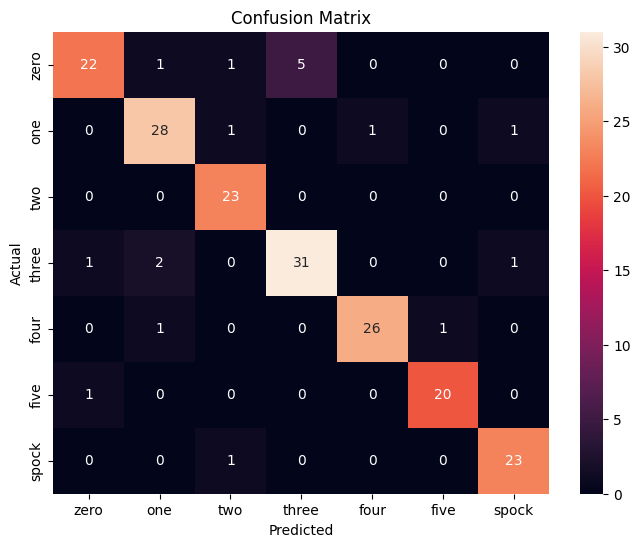

In [21]:
# view confusion-matrix
# Print the Confusion Matrix and slice it into four pieces

predictions = clf.predict(X_test)

class_names = ["zero", "one", "two", "three", "four", "five", "spock"]
conf_matrix = confusion_matrix(y_test, predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [22]:
import cv2
import mediapipe as mp

# Initialisieren von MediaPipe und Hands
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
hands = mp_hands.Hands(min_detection_confidence=0.8, min_tracking_confidence=0.5)

# Pfad zum Bild auf Ihrer Festplatte
image_path = "C:/Users/henri/Documents/testData/image_spock_13.jpg" #add your path

# Bild einlesen
image = cv2.imread(image_path)

# BGR 2 RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Detections
with hands:
    results = hands.process(image_rgb)
    
# Extrahieren der Koordinaten der Handlandmarken
landmark_coords = {}
if results.multi_hand_landmarks:
    for i, landmark in enumerate(results.multi_hand_landmarks[0].landmark):
        landmark_coords[f'x{i+1}'] = landmark.x
        landmark_coords[f'y{i+1}'] = landmark.y
        landmark_coords[f'z{i+1}'] = landmark.z

    # Ausgabe der Koordinaten


    # Erstellen eines Pandas DataFrame aus dem Dictionary
    df = pd.DataFrame([landmark_coords])


    y_pred=clf.predict(df)
    print(y_pred)
else:
    print('no hand detected')


['one']


In [23]:
import cv2
import mediapipe as mp
mp_drawing = mp.solutions.drawing_utils
mp_hands = mp.solutions.hands

In [24]:
cap = cv2.VideoCapture(0)
clf = lgb.LGBMClassifier(num_leaves=26,verbose=-1)
clf.fit(X_train, y_train)


with mp_hands.Hands(min_detection_confidence=0.8, min_tracking_confidence=0.5) as hands: 
    while cap.isOpened():
        ret, frame = cap.read()
        
        # BGR 2 RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        
        # Flip on horizontal
        image = cv2.flip(image, 1)
        
        # Set flag
        image.flags.writeable = False
        
        # Detections
        results = hands.process(image)
        
        # Set flag to true
        image.flags.writeable = True
        
        # RGB 2 BGR
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Detections
        print(results)
        
        # Rendering results
        landmark_coords = {}
        if results.multi_hand_landmarks:
            for i, landmark in enumerate(results.multi_hand_landmarks[0].landmark):
                landmark_coords[f'x{i+1}'] = landmark.x
                landmark_coords[f'y{i+1}'] = landmark.y
                landmark_coords[f'z{i+1}'] = landmark.z
                # Erstellen eines Pandas DataFrame aus dem Dictionary
            df = pd.DataFrame([landmark_coords])
            y_pred = clf.predict(df)
            print(y_pred)
            
            # font 
            font = cv2.FONT_HERSHEY_SIMPLEX 
            
            # org 
            org = (00, 185) 
            
            # fontScale 
            fontScale = 1
            
            # Red color in BGR 
            color = (0, 0, 255) 
            
            # Line thickness of 2 px 
            thickness = 2
            
            # Using cv2.putText() method 
            image = cv2.putText(image, y_pred[0], org, font, fontScale,  
                            color, thickness, cv2.LINE_AA, False)
            for num, hand in enumerate(results.multi_hand_landmarks):
                mp_drawing.draw_landmarks(image, hand, mp_hands.HAND_CONNECTIONS, 
                                        mp_drawing.DrawingSpec(color=(121, 22, 76), thickness=2, circle_radius=4),
                                        mp_drawing.DrawingSpec(color=(250, 44, 250), thickness=2, circle_radius=2),
                                         )
        
        cv2.imshow('Hand Tracking', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti